<a href="https://colab.research.google.com/github/Kennyc222/MResPythonAlgorithm/blob/main/Halotools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install Halotools: See [here](https://halotools.readthedocs.io/en/latest/) for reference. Note: It may take up to 5 to 7 minutes or more to install it, be paitence!

In [ ]:
!pip install halotools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 24.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for halotools: filename=halotools-0.9.3-cp312-cp312-linux_x86_64.whl size=20030961 sha256=b58dcd5b9ed253ebc8df3530a711e5f6ecc2cc29329e81c5eb723ac592746ef8
  Stored in directory: /root/.cache/pip/wheels/1f/cb/af/6a3aa3602cd1a8eaeec41e99e36aaf7e830c079fdd685cc81f
Successfully built halotools


# Import packages

In [ ]:
import halotools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from halotools import mock_observables
from halotools.mock_observables import angular_tpcf
import csv
import pandas as pd
from halotools.mock_observables import mean_y_vs_x

#Insert Data in .csv

In [ ]:
data = "Wd1_SIMULATION_original_v2_HALOTOOLS.csv"
df = pd.read_csv(data)
df

ra = df['ra']
dec = df['dec']

Make a star distribution graph as preview

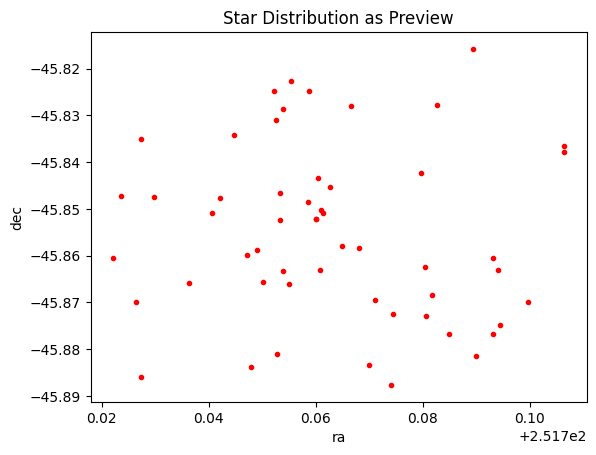

In [ ]:
plt.plot(ra,dec,'.',color='red')
plt.xlabel('ra')
plt.ylabel('dec')
plt.title('Star Distribution as Preview')
plt.show()

#Build a random Catalog

In [ ]:
#MUST BE SAME VOLUME or funny results wil lbe generated! :)
ra_min = np.min(ra)
ra_max = np.max(ra)
dec_min = np.min(dec)
dec_max = np.max(dec)
print('ra range = %f .. %f' % (ra_min, ra_max))
print('dec range = %f .. %f' % (dec_min, dec_max))

rand_ra = np.random.uniform(ra_min, ra_max, 54)
rand_sincdec = np.random.uniform(np.sin(dec_min), np.sin(dec_max), 54)
rand_dec = np.arcsin(rand_sincdec)

#R136 cluster stars' number = 1836
#30 Dor (Whole Region) cluster stars' number = 2957
#Wd1 Original = 660
#Wd1 modded = 54

ra range = 251.722090 .. 251.806440
dec range = -45.887669 .. -45.815805


#Calculate the angular 2pcf

In [ ]:
from halotools.mock_observables import angular_tpcf

angular_coords = np.vstack((ra,dec)).T
ran_angular_coords = np.vstack((rand_ra,rand_dec)).T

theta_bins = np.logspace(-2,0,15)
cen_theta_bins = (theta_bins[:-1] + theta_bins[1:])/2.0

w_theta_with_randoms = angular_tpcf(angular_coords, theta_bins, num_threads='max')

#If randoms=ran_angular_coords doesn't work doesn't work, just remove it from w_theta_with_randoms. It should be included by default. IT
#should be w_theta_with_randoms = angular_tpcf(angular_coords, theta_bins, randoms=ran_angular_coords, num_threads='max'). Increasing no. of sample (more than 3000 or 4000) should help!

#Error Estimate

In [ ]:
tpcf_err_1= mean_y_vs_x (cen_theta_bins, 1+w_theta_with_randoms, bins = theta_bins, error_estimator='error_on_mean')
yerr_values = tpcf_err_1[0]
print(yerr_values)

[0.01194748 0.01660097 0.02306697 0.03205145 0.04453534 0.06188166
 0.08598428 0.11947477 0.16600966 0.23066968 0.32051448 0.44535342
 0.61881657 0.85984284]


#Plot it in standard method

<ErrorbarContainer object of 3 artists>

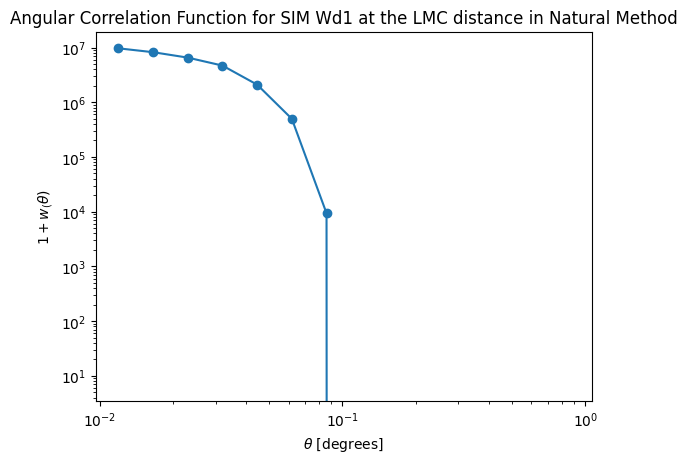

In [ ]:
plt.plot(cen_theta_bins,1.0+w_theta_with_randoms,'o-')
plt.loglog()
plt.ylabel(r'$1+w_(\theta)$')
plt.xlabel(r'$\theta$ $[{\rm degrees}]$' )
plt.title('Angular Correlation Function for SIM Wd1 at the LMC distance in Natural Method')
plt.errorbar(cen_theta_bins,1.0+w_theta_with_randoms,yerr=yerr_values, fmt = 'none', ecolor='red')

##Converting angular (in radian) in pc

In [ ]:
#s = D*tan(theta in radius, convertable from degree)

s_bins = (50000 *np.tan(np.deg2rad(cen_theta_bins)))/12.5
s_bins

array([ 0.83409129,  1.1589661 ,  1.61037822,  2.23761339,  3.10915403,
        4.32015633,  6.00283993,  8.34092486, 11.58969314, 16.10386834,
       22.37636502, 31.09216023, 43.20322636, 60.03286098])

#Plot it again but in pc

<ErrorbarContainer object of 3 artists>

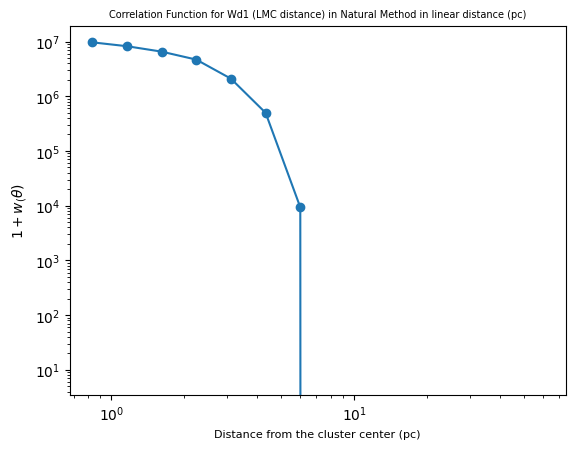

In [ ]:
plt.plot(s_bins,1.0+w_theta_with_randoms,'o-')
plt.loglog()
plt.ylabel(r'$1+w_(\theta)$')
plt.xlabel(r'Distance from the cluster center (pc)', fontsize=8 )
plt.title('Correlation Function for Wd1 (LMC distance) in Natural Method in linear distance (pc)', fontsize=7)
#plt.xlim(10.426,10.45)
plt.errorbar(s_bins,1.0+w_theta_with_randoms,yerr=yerr_values, fmt = 'none', ecolor='red')

#Plot the 2nd plot but in LS Method

[0.01194748 0.01660097 0.02306697 0.03205145 0.04453534 0.06188166
 0.08598428 0.11947477 0.16600966 0.23066968 0.32051448 0.44535342
 0.61881657 0.85984284]


<ErrorbarContainer object of 3 artists>

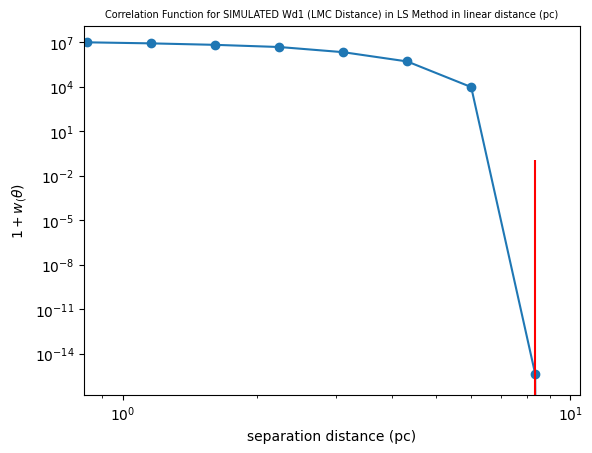

In [ ]:
#Use LS instead of Natural
angular_coords = np.vstack((ra,dec)).T
ran_angular_coords = np.vstack((rand_ra,rand_dec)).T

theta_bins = np.logspace(-2,0,15)
cen_theta_bins = (theta_bins[:-1] + theta_bins[1:])/2.0

w_theta_with_randoms = angular_tpcf(angular_coords, theta_bins, estimator ='Landy-Szalay', num_threads='max')

#=-===============================================
#Calculating Errors
tpcf_err_1= mean_y_vs_x (cen_theta_bins, 1+w_theta_with_randoms, bins = theta_bins, error_estimator='error_on_mean')
yerr_values_2 = tpcf_err_1[0]
print(yerr_values_2)

#==================================================
#Angle to linear distance (pc)
s_bins_2 = 4000 *np.tan(np.deg2rad(cen_theta_bins))
s_bins_2

#=================================================
plt.plot(s_bins,1.0+w_theta_with_randoms,'o-')
plt.loglog()
plt.ylabel(r'$1+w_(\theta)$')
plt.xlabel(r'separation distance (pc)' )
plt.title('Correlation Function for SIMULATED Wd1 (LMC Distance) in LS Method in linear distance (pc)', fontsize=7)
plt.xlim(0.82,10.5)
#plt.ylim(1,13)
plt.errorbar(s_bins,1.0+w_theta_with_randoms,yerr=yerr_values, fmt = 'none', ecolor='red')
